# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install plotly

  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.0 MB/s  0:00:06m0:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
!pip install wordcloud

## Importing the necessary libraries

In [4]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load('/home/pmoha/anaconda3/lib/python3.12/site-packages/en_core_web_sm/en_core_web_sm-3.7.1')
from spacy.lang.en.stop_words import STOP_WORDS
# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [5]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [6]:
# Import the first file - True.csv
true_df = pd.read_csv('/mnt/c/Users/pmoha/Downloads/NLP_Case_Study/NLP_Case_Study/True.csv')
# Import the second file - Fake.csv
fake_df = pd.read_csv('/mnt/c/Users/pmoha/Downloads/NLP_Case_Study/NLP_Case_Study/Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [7]:
# Inspect the DataFrame with True News to understand the given data
true_df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [5]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head()

title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [8]:
# Print the column details for True News DataFrame
true_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [9]:
# Print the column details for Fake News Dataframe
fake_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [10]:
# Print the column names of both DataFrames
true_df.columns, fake_df.columns

(Index(['title', 'text', 'date'], dtype='object'),
 Index(['title', 'text', 'date'], dtype='object'))

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [11]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [12]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([true_df, fake_df]).reset_index(drop=True)

In [13]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [14]:
# Check Presence of Null Values
print("Null values: \n", df.isnull().sum())

Null values: 
 title         21
text          21
date          42
news_label     0
dtype: int64


In [15]:
# Handle Rows with Null Values
df = df.dropna()
df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [16]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title'] + " " + df['date'] + " " + df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
df = df[['news_text', 'news_label']]

# Display the first 5 rows of the updated DataFrame to check the result
df.head()


news_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        As U.S. budget fight looms, Republicans flip their fiscal script December 31, 2017  WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, 

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [17]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame({
    'news_label': df['news_label'],
    'cleaned_text': None,  # to be filled after cleaning
    'lemmatized_text': None  # to be filled after lemmatization and POS filtering
})
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df['news_label']
df_clean.head()

news_label cleaned_text lemmatized_text
0           1         None            None
1           1         None            None
2           1         None            None
3           1         None            None
4           1         None            None

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [18]:
# Write the function here to clean the text and remove all the unnecessary elements
def text_cleaning(text):
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove words with numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [19]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = df['news_text'].progress_apply(text_cleaning)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44898/44898 [00:12<00:00, 3613.04it/s]


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [20]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def pos_lemmatize(text):
    doc = nlp(text)
    # Keep only nouns (NN, NNS) and remove stopwords
    tokens = [
        token.lemma_ for token in doc
        if token.pos_ == 'NOUN' and token.text.lower() not in STOP_WORDS
    ]
    return ' '.join(tokens)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [24]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(pos_lemmatize)

100%|█████████████████████████████████████████████████████████████████████████████| 44898/44898 [48:48<00:00, 15.33it/s]


### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [22]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [23]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [24]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   cleaned_text     44898 non-null  object
 2   lemmatized_text  44880 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [25]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    df_clean[['cleaned_text','lemmatized_text']], df_clean['news_label'], test_size=0.3, random_state=42
)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [26]:
# Add a new column to calculate the character length of cleaned news text
X_train['cleaned_text_length'] = X_train['cleaned_text'].fillna('').apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
X_train['lemmatized_text_length'] = X_train['lemmatized_text'].fillna('').apply(len)


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

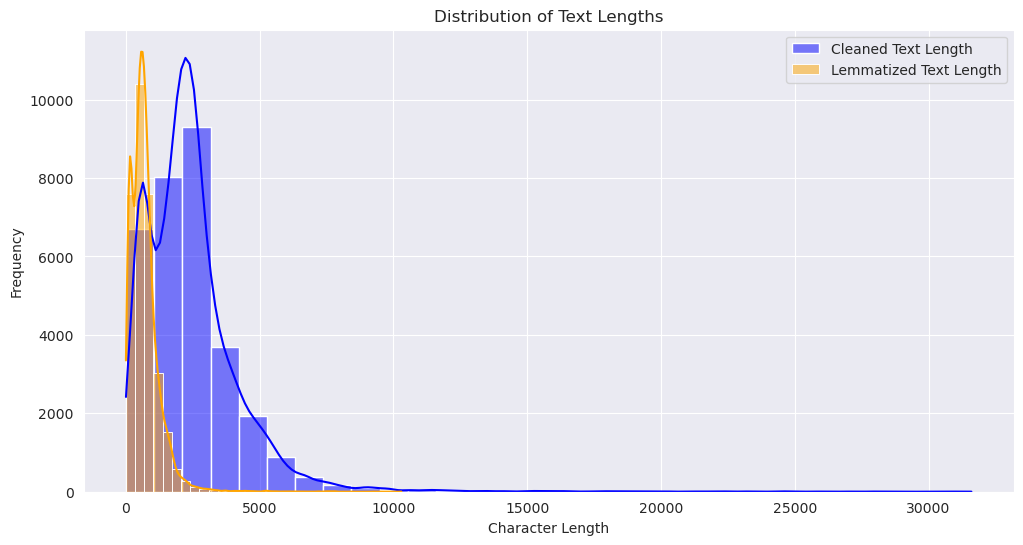

In [27]:
# Create a histogram plot to visualise character lengths
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
# Add histogram for cleaned news text
sns.histplot(X_train['cleaned_text_length'], bins=30, kde=True, color='blue', label='Cleaned Text Length') 
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(X_train['lemmatized_text_length'], bins=30, kde=True, color='orange', label='Lemmatized Text Length')
plt.legend()
plt.title('Distribution of Text Lengths')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

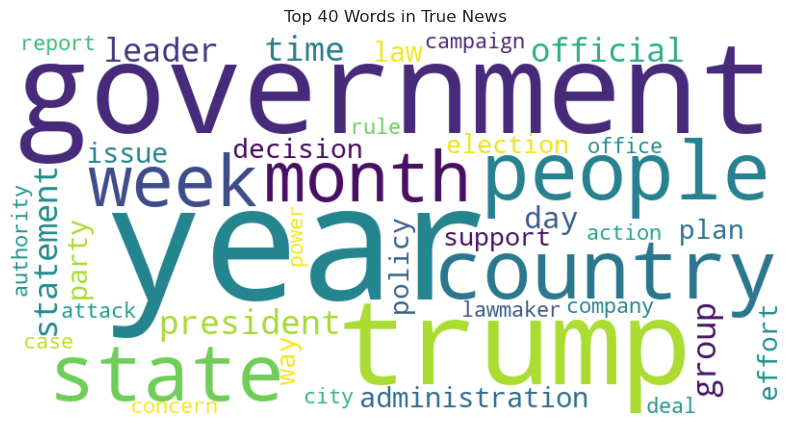

In [28]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
train_test_true = X_train[y_train == 1]['lemmatized_text'].fillna('').astype(str)
# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400,max_words=40, background_color='white').generate(' '.join(train_test_true))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

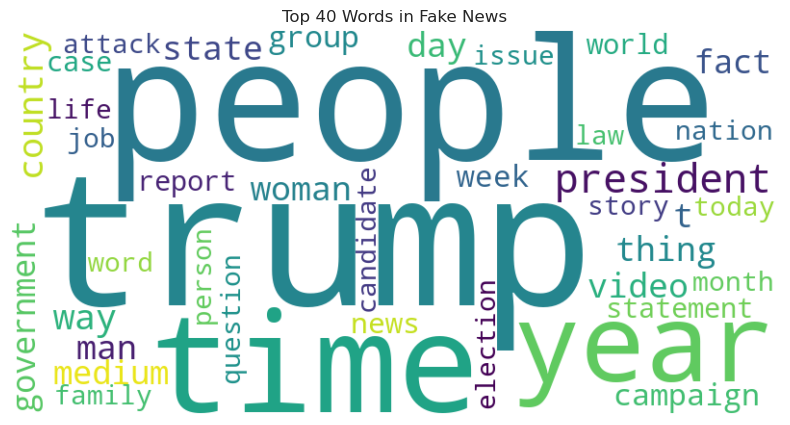

In [29]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
train_test_fake = X_train[y_train == 0]['lemmatized_text'].fillna('').astype(str)
# Generate word cloud for Fake News
wordcloud = WordCloud(width=800, height=400,max_words=40, background_color='white').generate(' '.join(train_test_fake))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [30]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    counts = X.sum(axis=0).A1
    feature_names = vectorizer.get_feature_names_out()
    if n is not None:
        top_n_indices = counts.argsort()[::-1][:n]
        return [(feature_names[i], counts[i]) for i in top_n_indices]
    return list(zip(feature_names, counts))

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [31]:
# Handle NaN values in the text data
X_train['lemmatized_text'] = X_train['lemmatized_text'].fillna('')
X_val['lemmatized_text'] = X_val['lemmatized_text'].fillna('')


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

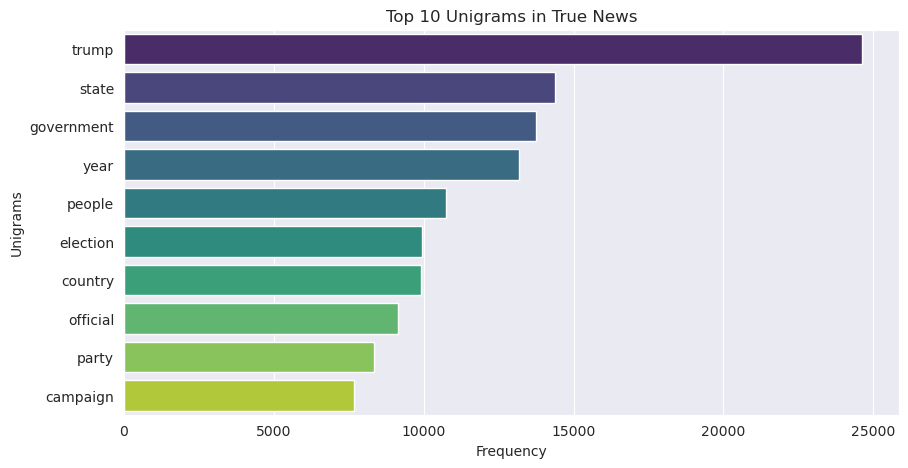

In [32]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams = get_top_ngrams(X_train[y_train == 1]['lemmatized_text'], n=10, ngram_range=(1, 1))
plt.figure(figsize=(10, 5))
sns.barplot(x=[count for _, count in top_unigrams], y=[word for word, _ in top_unigrams], palette='viridis')
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



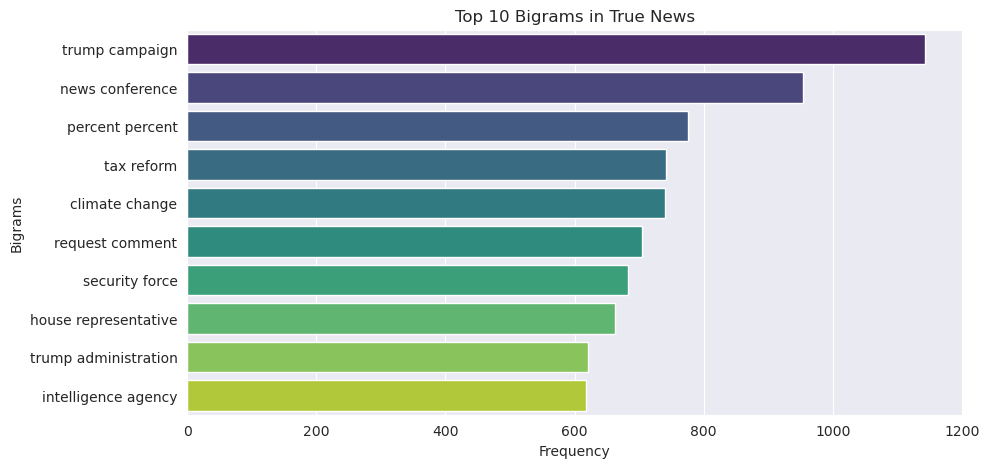

In [33]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams = get_top_ngrams(X_train[y_train == 1]['lemmatized_text'], n=10, ngram_range=(2, 2))
plt.figure(figsize=(10, 5))
sns.barplot(x=[count for _, count in top_bigrams], y=[word for word, _ in top_bigrams], palette='viridis')
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



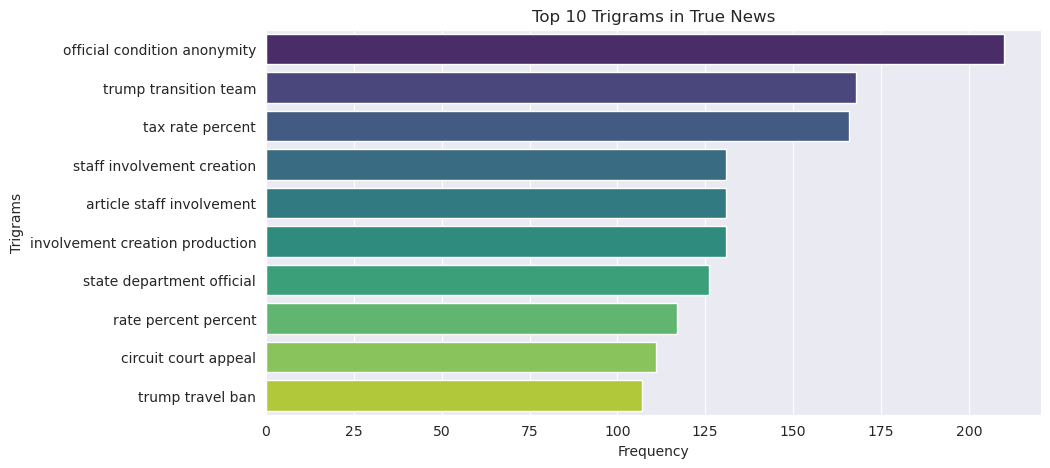

In [34]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams = get_top_ngrams(X_train[y_train == 1]['lemmatized_text'], n=10, ngram_range=(3, 3))
plt.figure(figsize=(10, 5))
sns.barplot(x=[count for _, count in top_trigrams], y=[word for word, _ in top_trigrams], palette='viridis')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

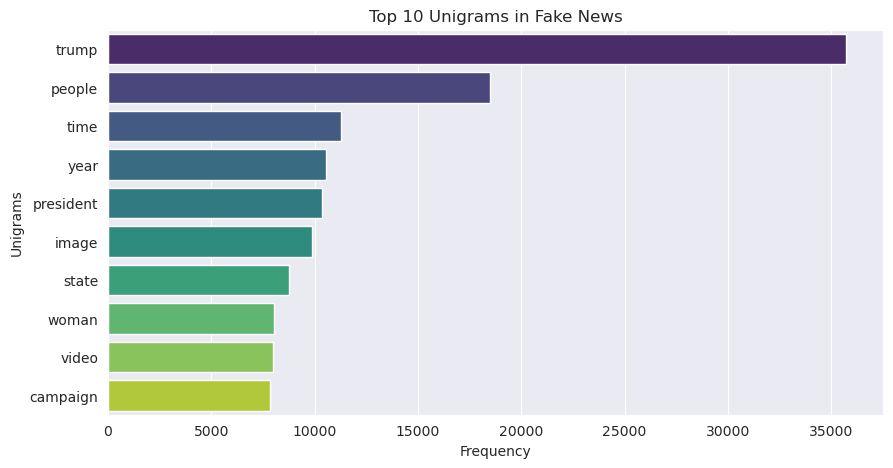

In [35]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(X_train[y_train == 0]['lemmatized_text'], n=10, ngram_range=(1, 1))
plt.figure(figsize=(10, 5))
sns.barplot(x=[count for _, count in top_unigrams_fake], y=[word for word, _ in top_unigrams_fake], palette='viridis')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



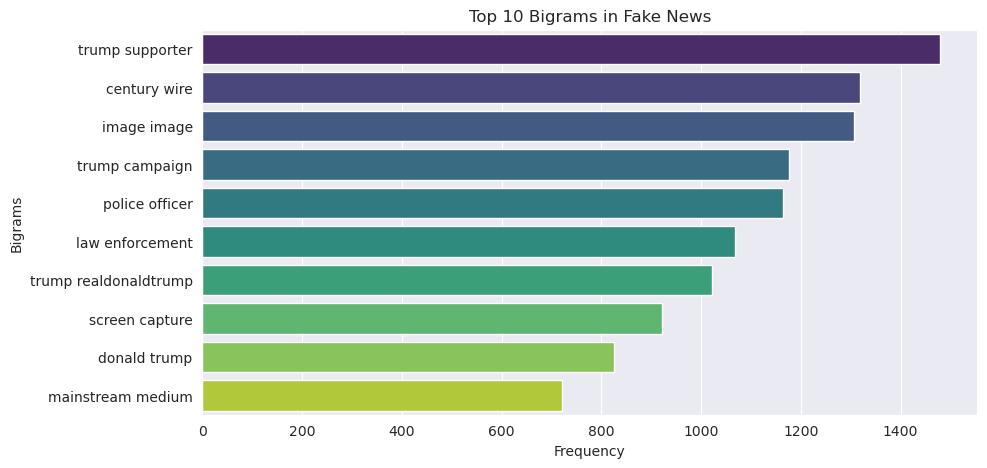

In [36]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(X_train[y_train == 0]['lemmatized_text'], n=10, ngram_range=(2, 2))
plt.figure(figsize=(10, 5))
sns.barplot(x=[count for _, count in top_bigrams_fake], y=[word for word, _ in top_bigrams_fake], palette='viridis')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [37]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(X_train[y_train == 0]['lemmatized_text'], n=10, ngram_range=(3, 3))
plt.figure(figsize=(10, 5))
sns.barplot(x=[count for _, count in top_trigrams_fake], y=[word for word, _ in top_trigrams_fake], palette='viridis')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [42]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
from gensim.models import KeyedVectors

w2v = KeyedVectors.load_word2vec_format("/mnt/c/Users/pmoha/Downloads/NLP_Case_Study/NLP_Case_Study/GoogleNews-vectors-negative300.bin", binary=True)

# Save in gensim format
w2v.save("GoogleNews-vectors-negative300.kv")

# Next time, load faster:
w2v = KeyedVectors.load("GoogleNews-vectors-negative300.kv")


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [44]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
w2v_train = np.array([
    np.mean([w2v[word] for word in text.split() if word in w2v] or [np.zeros(300)], axis=0)
    for text in X_train['lemmatized_text']
])
w2v_val = np.array([
    np.mean([w2v[word] for word in text.split() if word in w2v] or [np.zeros(300)], axis=0)
    for text in X_val['lemmatized_text']
])
## Extract the target variable for the training data and validation data
# already extracted


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [46]:
## Initialise Logistic Regression model
lr_model = LogisticRegression()

## Train Logistic Regression model on training data
lr_model.fit(w2v_train, y_train)

## Predict on validation data
y_pred_lr = lr_model.predict(w2v_val)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [47]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_lr):.4f}")

Logistic Regression Model Performance:
Accuracy: 0.9010
Precision: 0.8945
Recall: 0.9001
F1 Score: 0.8973


In [51]:
# Classification Report
class_report_lr = classification_report(y_val, y_pred_lr, target_names=['Fake News', 'True News'])
print(class_report_lr)


              precision    recall  f1-score   support

   Fake News       0.91      0.90      0.90      6996
   True News       0.89      0.90      0.90      6474

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [49]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier()
## Train Decision Tree model on training data
dt_model.fit(w2v_train, y_train)
## Predict on validation data
y_pred_dt = dt_model.predict(w2v_val)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [50]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_dt):.4f}")


Decision Tree Model Performance:
Accuracy: 0.8298
Precision: 0.8420
Recall: 0.7950
F1 Score: 0.8178


In [52]:
# Classification Report
class_report_dt = classification_report(y_val, y_pred_dt, target_names=['Fake News', 'True News'])
print(class_report_dt)


              precision    recall  f1-score   support

   Fake News       0.82      0.86      0.84      6996
   True News       0.84      0.80      0.82      6474

    accuracy                           0.83     13470
   macro avg       0.83      0.83      0.83     13470
weighted avg       0.83      0.83      0.83     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [53]:
## Initialise Random Forest model
rm_model = RandomForestClassifier() 
## Train Random Forest model on training data
rm_model.fit(w2v_train, y_train)
## Predict on validation data
y_pred_rm = rm_model.predict(w2v_val)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [54]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rm):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_rm):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_rm):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_rm):.4f}")

Random Forest Model Performance:
Accuracy: 0.9047
Precision: 0.9109
Recall: 0.8886
F1 Score: 0.8996


In [55]:
# Classification Report
class_report_rm = classification_report(y_val, y_pred_rm, target_names=['Fake News', 'True News'])
print(class_report_rm)


              precision    recall  f1-score   support

   Fake News       0.90      0.92      0.91      6996
   True News       0.91      0.89      0.90      6474

    accuracy                           0.90     13470
   macro avg       0.91      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In this case study, three semantic classification models were developed to distinguish between fake news and true news articles. We leveraged word2vec-google-news-300 word2vec model to get vectors for each document by summarizing it using averaging technique.

The exploratory data analysis (EDA) revealed distinct linguistic patterns between true and fake news. The analysis of unigrams, bigrams, and trigrams showed that fake news articles frequently centered around specific political figures and emotionally charged language, whereas true news often contained more formal and source-specific terms like "President."

#### Model Performance and Selection
Three supervised models were trained and evaluated. Their performance on the validation data is summarized below:

- Logistic Regression Model Performance:
   - Accuracy: 0.9010
   - Precision: 0.8945
   - Recall: 0.9001
   - F1 Score: 0.8973

- Decision Tree Model Performance:
    - Accuracy: 0.8298
    - Precision: 0.8420
    - Recall: 0.7950
    - F1 Score: 0.8178

- Random Forest Model Performance:
    - Accuracy: 0.9047
    - Precision: 0.9109
    - Recall: 0.8886
    - F1 Score: 0.8996

The Random Forest model emerged as the best-performing model. The Random Forest model achieved the highest accuracy and a very strong F1-score of 90.0%. Its high precision (91.1%) is particularly valuable as it ensures a low rate of incorrectly flagging legitimate news as fake.

